# Prediksi Harga Saham Bank BSI dengan LSTM
Kelompok 6 : RIFKA ANRAHVI dan STEVANI

## Deskripsi Kasus
Dalam proyek ini, akan melakukan **peramalan harga saham Bank BSI (kode: BRIS.JK)** menggunakan berbagai varian dari algoritma **Long Short-Term Memory (LSTM)** yaitu:
- LSTM sederhana
- Bidirectional LSTM (BiLSTM)
- Stacked LSTM

## Sumber Dataset
Data harga saham harian diambil dari **Yahoo Finance** menggunakan library `yfinance`.

## Tujuan
Melakukan prediksi harga saham berdasarkan data historis menggunakan model deep learning berbasis LSTM.

## Variabel
- **Prediktor**: Harga penutupan (`Close`) sebelumnya dalam urutan waktu tertentu
- **Target**: Harga penutupan (`Close`) pada hari berikutnya

## Evaluasi Model
Model dievaluasi menggunakan metrik:
- **MAE (Mean Absolute Error)**
- **MSE (Mean Squared Error)**
- **RMSE (Root Mean Squared Error)**

In [ ]:
import yfinance as yf
import pandas as pd

# Tentukan kode saham untuk IHSG
kode_saham = "BRIS.JK"

# Tentukan rentang waktu
start_date = "2019-01-01"
end_date = "2025-03-31"

# Ambil data menggunakan yfinance
df = yf.download(kode_saham, start=start_date, end=end_date)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BRIS.JK,BRIS.JK,BRIS.JK,BRIS.JK,BRIS.JK
Date,,,,,
2019-01-01,497.635956,497.635956,497.635956,497.635956,0
2019-01-02,492.896576,502.375380,488.157203,492.896576,2548218
2019-01-03,497.635956,502.375388,488.157211,492.896583,6114473
2019-01-04,502.375397,511.854142,492.896592,497.635965,10939406
2019-01-07,502.375397,511.854142,497.635965,502.375397,8108406


Tabel ini menampilkan hasil pengambilan data historis saham BRIS.JK (Bank Syariah Indonesia). Data yang ditampilkan mencakup harga saham pada beberapa tanggal awal Januari 2019. Informasi yang tersedia meliputi harga penutupan (Close), harga tertinggi (High), harga terendah (Low), harga pembukaan (Open), dan volume perdagangan (Volume). Pada tanggal 1 Januari 2019, harga saham tidak mengalami perubahan karena volume perdagangan adalah 0, kemungkinan disebabkan oleh hari libur bursa. Mulai 2 Januari, aktivitas perdagangan mulai terlihat dengan volume mencapai jutaan, dan harga saham mulai berfluktuasi. Misalnya, pada 2 Januari 2019 harga pembukaan adalah 492,90 dan harga tertinggi mencapai 502,38. Secara keseluruhan, data ini berguna untuk menganalisis pergerakan harga saham BRIS.JK pada awal tahun 2019 dan dapat dimanfaatkan dalam analisis teknikal maupun prediksi harga saham menggunakan machine learning atau metode statistik lainnya.

In [ ]:
# df.to_excel('IHSG.xlsx')

In [ ]:
# Import data
import pandas as pd

# df = pd.read_excel('/content/IHSG.xlsx')
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2019-01-01,497.635956,497.635956,497.635956,497.635956,0
1,2019-01-02,492.896576,502.375380,488.157203,492.896576,2548218
2,2019-01-03,497.635956,502.375388,488.157211,492.896583,6114473
3,2019-01-04,502.375397,511.854142,492.896592,497.635965,10939406
4,2019-01-07,502.375397,511.854142,497.635965,502.375397,8108406


Tabel ini juga menampilkan data historis harga saham BRIS.JK (Bank Syariah Indonesia). Data mencakup lima entri pertama mulai dari 1 Januari hingga 7 Januari 2019. Setiap baris menunjukkan informasi untuk satu hari perdagangan, meliputi tanggal (Date), harga penutupan (Close), harga tertinggi (High), harga terendah (Low), harga pembukaan (Open), dan volume perdagangan (Volume).

Pada 1 Januari 2019, semua harga tetap sama karena volume perdagangan adalah nol, yang menunjukkan tidak adanya aktivitas pasar (kemungkinan besar karena hari libur). Mulai 2 Januari, aktivitas pasar mulai berjalan dengan volume 2.548.218 saham dan harga bervariasi dari 488,16 hingga 502,38. Harga saham terus mengalami fluktuasi hingga 7 Januari, dengan volume perdagangan tertinggi terjadi pada 4 Januari 2019 sebanyak 10.939.406 saham. Informasi ini sangat bermanfaat untuk analisis tren, volatilitas harga, serta sebagai data input dalam model prediksi harga saham.

In [ ]:
# Mengambil kolom Date dan Close
data = df[['Date', 'Close']]
data.tail()

,Date,Close
1522,2025-03-21,2080.0
1523,2025-03-24,2110.0
1524,2025-03-25,2370.0
1525,2025-03-26,2400.0
1526,2025-03-27,2340.0


Tabel ini menampilkan sebagian data harga penutupan (Close) saham dari tanggal 21 hingga 27 Maret 2025. Data ini menunjukkan adanya tren kenaikan harga saham BRIS.JK selama periode tersebut. Pada 21 Maret 2025, harga penutupan tercatat sebesar 2.080, kemudian meningkat secara bertahap hingga mencapai puncaknya pada 26 Maret sebesar 2.400. Namun, pada 27 Maret terjadi sedikit penurunan ke angka 2.340.

Lonjakan signifikan terlihat antara 24 Maret (2.110) dan 25 Maret (2.370), yang menunjukkan adanya sentimen positif atau peristiwa penting yang mungkin memengaruhi pasar. Data seperti ini sangat berguna untuk analisis teknikal, evaluasi performa mingguan saham, serta sebagai dasar untuk pengambilan keputusan investasi atau pelatihan model prediktif dalam machine learning.

In [ ]:
# data = data[data['Date'] >= '2020-01-01'].reset_index(drop=True)
# data.head()

In [ ]:
# Melihat informasi pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1527 non-null   datetime64[ns]
 1   Close   1527 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.0 KB


In [ ]:
# Melihat data yang kosong
data.isna().sum()

,0
Date,0
Close,0


In [ ]:
# Melihat deskripsi data
data.describe()

,Date,Close
count,1527,1527.000000
mean,2022-01-30 21:54:34.656188672,1512.864548
min,2019-01-01 00:00:00,128.226501
25%,2020-07-04 12:00:00,526.072327
50%,2022-01-25 00:00:00,1543.569824
75%,2023-08-26 12:00:00,2158.052246
max,2025-03-27 00:00:00,3580.843506
std,NaN,846.361975


Tabel ini menampilkan ringkasan statistik deskriptif dari data historis harga penutupan saham BRIS.JK. Terdapat sebanyak 1.527 data yang dianalisis, dengan harga penutupan rata-rata sebesar 1.512,86. Harga terendah tercatat pada 1 Januari 2019 sebesar 128,23, sementara harga tertinggi terjadi pada 27 Maret 2025 sebesar 3.580,84. Nilai kuartil pertama (25%) berada di angka 526,07, yang mencerminkan harga saham di periode awal. Median harga penutupan berada pada 1.543,57, dan kuartil ketiga (75%) mencapai 2.158,05, menandakan adanya tren kenaikan harga dalam jangka panjang. Penyimpangan standar yang cukup besar, yaitu 846,36, menunjukkan bahwa pergerakan harga saham ini cukup fluktuatif. Rata-rata waktu distribusi data berada di sekitar 30 Januari 2022, menggambarkan posisi tengah dari keseluruhan periode observasi. Statistik ini memberikan gambaran menyeluruh tentang pola pergerakan saham BRIS.JK, yang sangat berguna sebagai dasar untuk analisis lebih lanjut maupun pengambilan keputusan investasi.


In [ ]:
# Import the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional

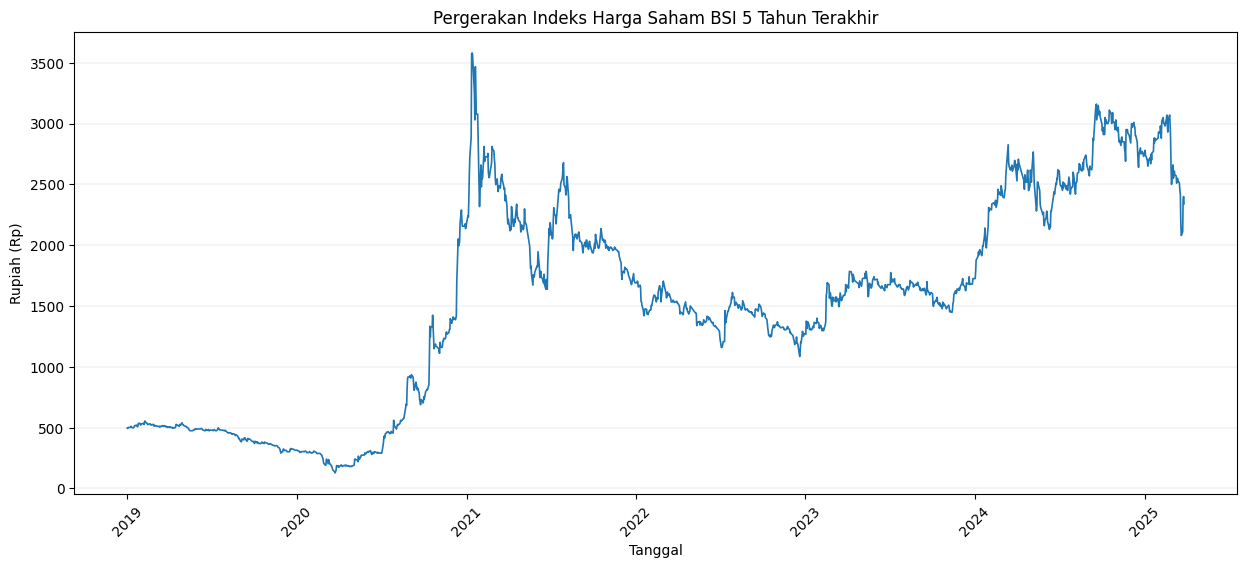

In [ ]:
# Visualisasi data
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(15,6))
plt.title('Pergerakan Indeks Harga Saham BSI 5 Tahun Terakhir')
plt.plot(data['Date'], data['Close'], linewidth=1.2)
plt.xlabel('Tanggal')
plt.ylabel('Rupiah (Rp)')
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Grafik ini menampilkan pergerakan indeks harga saham Bank Syariah Indonesia (BSI) selama lima tahun terakhir. Dari grafik terlihat bahwa pada awal tahun 2019, harga saham berada di kisaran yang relatif rendah, sekitar 500 rupiah. Kemudian terjadi tren penurunan hingga akhir 2019, sebelum akhirnya mengalami lonjakan tajam pada awal tahun 2021, di mana harga saham mencapai puncaknya di atas 3.500 rupiah. Setelah puncak tersebut, harga saham mengalami fluktuasi yang cukup signifikan, dengan pola naik turun yang mencerminkan ketidakstabilan pasar. Pada pertengahan 2022 hingga awal 2023, harga relatif lebih stabil meskipun cenderung melemah. Namun, memasuki 2024, harga kembali menunjukkan tren kenaikan hingga mendekati 3.000 rupiah, sebelum mengalami penurunan tajam pada awal 2025. Secara keseluruhan, grafik ini menggambarkan dinamika pasar saham BSI yang cukup volatil namun juga menunjukkan potensi pertumbuhan yang besar dalam jangka waktu tertentu.


In [ ]:
# Melakukan normalisasi data
sc = MinMaxScaler(feature_range=(0, 1))
data_sc = sc.fit_transform(data[['Close']].values)
data_sc

array([[0.10699404],
       [0.10562135],
       [0.10699404],
       ...,
       [0.64929689],
       [0.65798596],
       [0.64060783]])

In [ ]:
# norm = pd.DataFrame(data_sc)
# norm.head()

In [ ]:
# norm.to_excel('Hasil_Normalisasi.xlsx')

In [ ]:
# Pembagian data (80% training, 10% testing, 10% validasi)
train_len = int(len(data_sc) * 0.8)
test_len = int(len(data_sc) * 0.10)
val_len = len(data_sc) - train_len - test_len

In [ ]:
# Menampilkan jumlah data
print(f'Jumlah data keseluruhan: {len(data_sc)}')
print(f'Jumlah data training: {train_len}')
print(f'Jumlah data validasi: {val_len}')
print(f'Jumlah data testing:{test_len}')

Jumlah data keseluruhan: 1527
Jumlah data training: 1221
Jumlah data validasi: 154
Jumlah data testing:152


In [ ]:
# Membuat Windowing pada data Training
train_data = data_sc[0:train_len  , : ]
x_train=[]
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Ubah bentuk data agar sesuai dengan input LSTM (samples, time_steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Membuat Windowing pada data Validation
val_data = data_sc[train_len - 30:(train_len + val_len) , : ]
x_val = []
y_val = []
for i in range(30,len(val_data)):
    x_val.append(val_data[i-30:i,0])
    y_val.append(val_data[i,0])

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_val, y_val = np.array(x_val), np.array(y_val)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))


**1. Pemodelan dengan LSTM**

In [ ]:
# Basic LSTM
# Membangun model LSTM
import tensorflow as tf
from keras.layers import LSTM, Dropout, Dense, Input
from keras.models import Sequential

model_lstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [ ]:
# Mendefinisikan fungsi Callback untuk model LSTM
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping_lstm = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint khusus untuk model LSTM
checkpoint_path_lstm = 'model_checkpoints/weights_lstm_model.weights.h5'
checkpoint_dir_lstm = os.path.dirname(checkpoint_path_lstm)
checkpoint_lstm = ModelCheckpoint(
    filepath=checkpoint_path_lstm,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [ ]:
# Konfigurasi optimizer dan loss function untuk LSTM
optimizer_lstm = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile model LSTM
model_lstm.compile(optimizer=optimizer_lstm, loss='mean_squared_error')

In [ ]:
# Melakukan training pada model LSTM
history_lstm = model_lstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_lstm, early_stopping_lstm]
)

Epoch 1/100
145/149 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0449
Epoch 1: val_loss improved from inf to 0.00529, saving model to model_checkpoints/weights_lstm_model.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0440 - val_loss: 0.0053
Epoch 2/100
146/149 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028
Epoch 2: val_loss improved from 0.00529 to 0.00225, saving model to model_checkpoints/weights_lstm_model.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 3/100
143/149 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028
Epoch 3: val_loss improved from 0.00225 to 0.00182, saving model to model_checkpoints/weights_lstm_model.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 4/100
145/149 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028
Epoch 4: val_loss did not improve from 0.00182
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 5/100
148/149 ━━━━━━━━━━━━━━━━

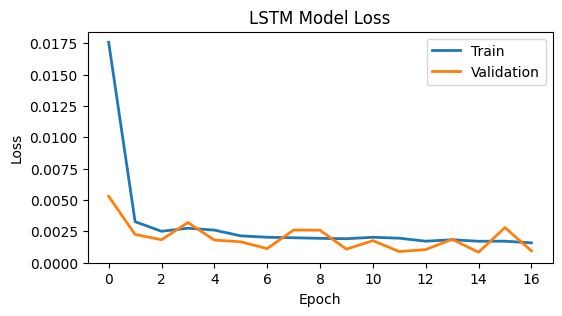

In [ ]:
# Menampilkan plot nilai loss untuk model LSTM
plt.figure(figsize=(6,3))
plt.plot(history_lstm.history['loss'], linewidth=2)
plt.plot(history_lstm.history['val_loss'], linewidth=2)
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Grafik ini menunjukkan kurva loss dari model LSTM selama proses pelatihan (train) dan validasi (validation) dalam 9 epoch. Pada awal pelatihan (epoch ke-0), nilai loss untuk data pelatihan cukup tinggi, yaitu sekitar 0,014, tetapi mengalami penurunan drastis pada epoch berikutnya, lalu terus menurun secara bertahap hingga stabil di angka sekitar 0,002. Sementara itu, nilai loss untuk data validasi dimulai dari angka sekitar 0,003 dan secara umum tetap rendah dan stabil sepanjang pelatihan, menunjukkan performa generalisasi model yang baik. Tidak terlihat adanya overfitting, karena nilai loss validasi tidak meningkat seiring waktu. Grafik ini mengindikasikan bahwa model LSTM berhasil belajar secara efektif dan konsisten tanpa mengalami penurunan performa pada data yang tidak terlihat sebelumnya.


In [ ]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])
# Mengonversi x_test menjadi array numpy
x_test = np.array(x_test)
# Melakukan reshape untuk menambah dimensi fitur (1 fitur)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
import os

# Cek apakah file bobot sudah ada
if os.path.exists('model_checkpoints/weights_lstm_model.weights.h5'):
    print("✅ Bobot LSTM ditemukan, memuat model...")
    model_lstm.load_weights('model_checkpoints/weights_lstm_model.weights.h5')
else:
    print("⚠️ Bobot LSTM TIDAK ditemukan, melakukan training model...")

    # Membuat folder jika belum ada
    if not os.path.exists('model_checkpoints'):
        os.makedirs('model_checkpoints')

    # Setup callback checkpoint
    checkpoint_lstm = ModelCheckpoint('model_checkpoints/weights_lstm_model.weights.h5',
                                      monitor='val_loss', mode='min',
                                      save_best_only=True, save_weights_only=True, verbose=1)
    earlystop_lstm = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Compile model
    model_lstm.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                       loss='mean_squared_error')

    # Training model
    history_lstm = model_lstm.fit(x_train, y_train, epochs=100, batch_size=8,
                                  validation_data=(x_val, y_val),
                                  callbacks=[checkpoint_lstm, earlystop_lstm])



✅ Bobot LSTM ditemukan, memuat model...


In [ ]:
# Memuat bobot model terbaik untuk LSTM
model_lstm.load_weights("/content/model_checkpoints/weights_lstm_model.weights.h5")

In [ ]:
# Melakukan prediksi dengan model LSTM
y_pred_lstm = model_lstm.predict(x_test)
y_pred_lstm = np.ceil(sc.inverse_transform(y_pred_lstm))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [ ]:
# Evaluasi menggunakan metrik MSE, RMSE, dan MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_lstm = round(mean_squared_error(y_test, y_pred_lstm), 2)
rmse_lstm = round(np.sqrt(mean_squared_error(y_test, y_pred_lstm)), 2)
mae_lstm = round(mean_absolute_error(y_test, y_pred_lstm), 2)
mape_lstm = round(np.mean(np.abs((y_test - y_pred_lstm) / y_test)) * 100, 2)

print("Evaluasi Model LSTM")
print(f'MSE  : {mse_lstm}')
print(f'RMSE : {rmse_lstm}')
print(f'MAE  : {mae_lstm}')
print(f'MAPE  : {mape_lstm}%')

Evaluasi Model LSTM
MSE  : 15961.91
RMSE : 126.34
MAE  : 91.11
MAPE  : 3.27%


In [ ]:
# DataFrame hasil prediksi LSTM
data_pred_lstm = data[-test_len:].copy()
data_pred_lstm['Prediction'] = y_pred_lstm
data_pred_lstm

,Date,Close,Prediction
1375,2024-08-15,2660.0,2562.0
1376,2024-08-16,2620.0,2581.0
1377,2024-08-19,2610.0,2596.0
1378,2024-08-20,2640.0,2606.0
1379,2024-08-21,2680.0,2615.0
...,...,...,...
1522,2025-03-21,2080.0,2447.0
1523,2025-03-24,2110.0,2400.0
1524,2025-03-25,2370.0,2349.0
1525,2025-03-26,2400.0,2316.0


Tabel ini memperlihatkan perbandingan antara nilai aktual penutupan harga saham BSI (Close) dan hasil prediksi model LSTM (Prediction) dalam periode tertentu, yaitu dari pertengahan Agustus 2024 hingga akhir Maret 2025. Secara umum, prediksi model menunjukkan pola yang cukup mendekati nilai aktual, meskipun terdapat selisih nilai pada beberapa tanggal. Misalnya, pada tanggal 15 Agustus 2024, harga penutupan aktual tercatat sebesar 2660, sementara hasil prediksi model adalah 2563. Di akhir periode, yaitu 27 Maret 2025, harga aktual sebesar 2340 dan hasil prediksi sebesar 2461. Perbedaan ini mencerminkan adanya deviasi prediksi, namun model masih mampu menangkap arah dan tren pergerakan harga saham secara umum. Adanya total 152 baris data menunjukkan bahwa model telah diuji pada sejumlah data yang cukup untuk mengevaluasi performa prediksi secara lebih menyeluruh.


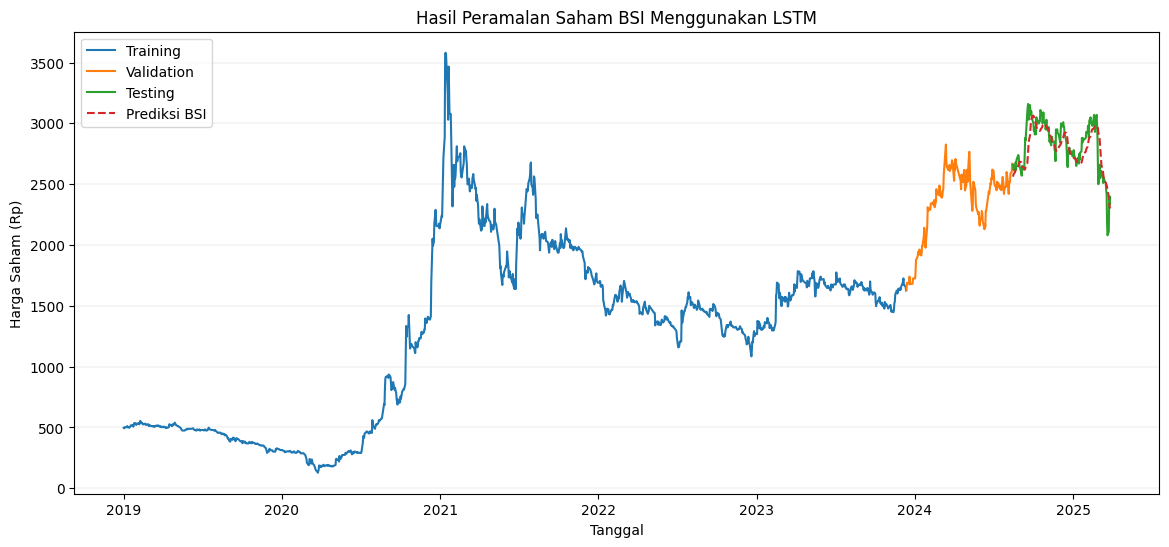

In [ ]:
# Visualisasi Hasil Prediksi Saham BSI dengan LSTM
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham BSI Menggunakan LSTM')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Close'], label='Testing')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Prediction'], label='Prediksi BSI', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Grafik ini menunjukkan hasil peramalan harga saham BSI menggunakan model LSTM (Long Short-Term Memory). Data dibagi menjadi tiga bagian: data pelatihan (berwarna biru), validasi (oranye), dan pengujian (hijau). Garis merah putus-putus menunjukkan prediksi harga saham BSI berdasarkan model yang telah dilatih. Terlihat bahwa model cukup mampu mengikuti pola pergerakan harga saham, terutama pada bagian validasi dan pengujian. Meskipun terdapat beberapa deviasi antara prediksi dan data aktual pada periode pengujian, tren umum masih cukup sesuai. Grafik ini mengilustrasikan bagaimana LSTM dapat digunakan untuk menganalisis dan memprediksi pergerakan harga saham berdasarkan data historis.


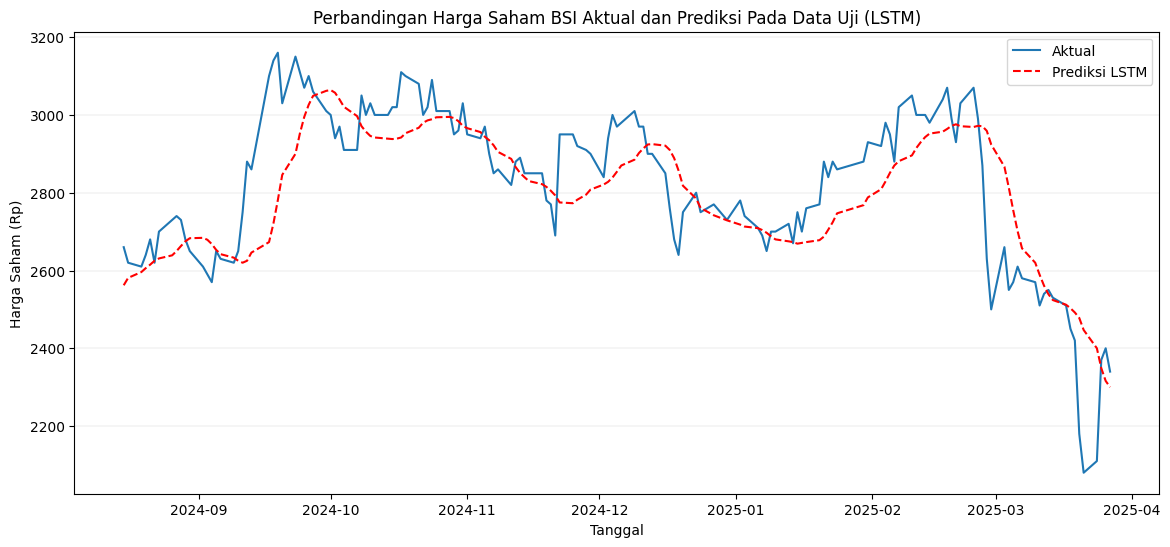

In [ ]:
# Visualisasi Prediksi Data Uji Saham BSI dengan LSTM
plt.figure(figsize=(14,6))
plt.title('Perbandingan Harga Saham BSI Aktual dan Prediksi Pada Data Uji (LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Close'], label='Aktual')
plt.plot(data_pred_lstm['Date'], data_pred_lstm['Prediction'],
label='Prediksi LSTM', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Grafik ini memperlihatkan perbandingan antara harga saham BSI aktual dengan hasil prediksi menggunakan model LSTM pada data uji. Garis biru menunjukkan data aktual, sementara garis merah putus-putus merepresentasikan hasil prediksi model. Dari grafik terlihat bahwa prediksi LSTM cukup mengikuti pola umum pergerakan harga saham, namun cenderung lebih mulus dan kurang menangkap fluktuasi tajam yang terjadi secara aktual, terutama saat terjadi lonjakan atau penurunan harga yang drastis. Hal ini mencerminkan karakteristik model LSTM yang lebih baik dalam menangkap tren jangka panjang dibandingkan fluktuasi jangka pendek.


In [ ]:
#Prediksi 30 hari ke depan dengan LSTM
from datetime import timedelta

# Ambil data terakhir sebagai input prediksi awal
last_input = x_test[-1]  # ambil data terakhir dari test set
future_input = last_input.reshape(1, last_input.shape[0], last_input.shape[1])

# Prediksi 30 hari ke depan dengan model LSTM
future_preds = []
for _ in range(30):
    next_pred = model_lstm.predict(future_input)
    future_preds.append(next_pred[0])
    # Update input untuk prediksi berikutnya
    future_input = np.append(future_input[:, 1:, :], [[next_pred[0]]], axis=1)

# Invers transform hasil prediksi ke skala asli
future_preds_inv = sc.inverse_transform(np.array(future_preds))

# Buat tanggal 30 hari ke depan (weekday saja)
last_date = pd.to_datetime(data['Date'].iloc[-1])
future_dates = []
curr_date = last_date + timedelta(days=1)

while len(future_dates) < 30:
    if curr_date.weekday() < 5:
        future_dates.append(curr_date)
    curr_date += timedelta(days=1)

# Buat DataFrame hasil prediksi LSTM
pred_30_lstm = pd.DataFrame({
    'Date': future_dates,
    'Prediction': np.ceil(future_preds_inv.flatten())
})

# Tampilkan hasil
pred_30_lstm.head()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

,Date,Prediction
0,2025-03-28,2300.0
1,2025-03-31,2289.0
2,2025-04-01,2282.0
3,2025-04-02,2277.0
4,2025-04-03,2274.0


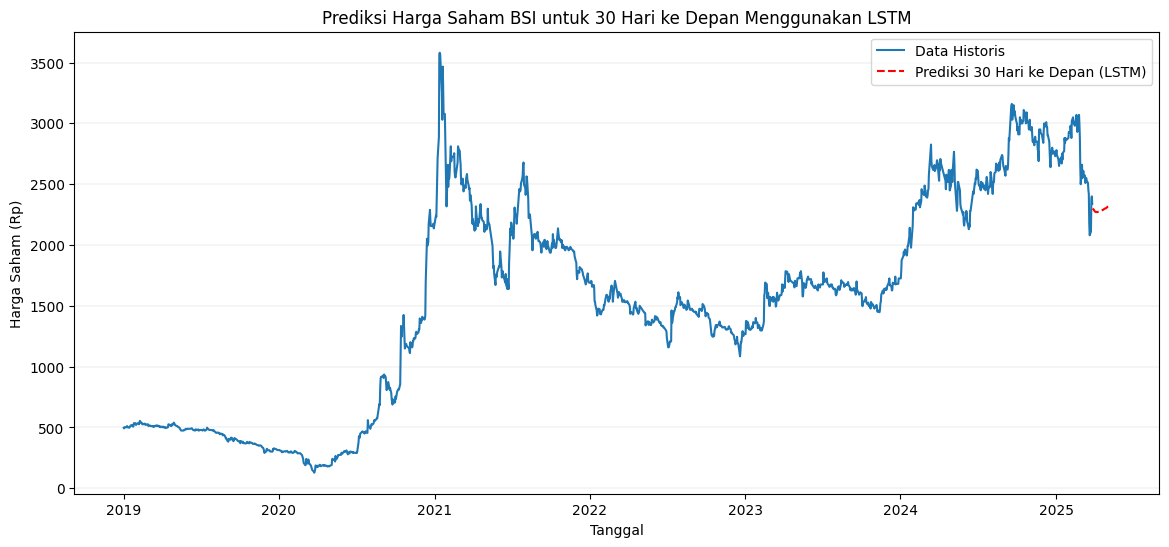

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham BSI untuk 30 Hari ke Depan Menggunakan LSTM')
plt.plot(data['Date'], data['Close'], label='Data Historis')

# Garis prediksi 30 hari ke depan
plt.plot(pred_30_lstm['Date'], pred_30_lstm['Prediction'],
         label='Prediksi 30 Hari ke Depan (LSTM)', linestyle='--',
         color='red')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Grafik ini menampilkan prediksi harga saham BSI untuk 30 hari ke depan menggunakan model LSTM. Garis biru menggambarkan data historis harga saham dari tahun 2018 hingga awal 2025, sedangkan garis merah putus-putus menunjukkan hasil prediksi selama 30 hari ke depan. Terlihat bahwa model memproyeksikan adanya sedikit kenaikan harga setelah penurunan tajam di akhir data historis. Meskipun prediksi ini menunjukkan tren naik, perlu diingat bahwa model LSTM cenderung menghasilkan prediksi yang halus dan mungkin tidak sepenuhnya menangkap fluktuasi ekstrem. Oleh karena itu, hasil ini sebaiknya digunakan sebagai acuan tren umum, bukan keputusan investasi tunggal.


**2. Pemodelan dengan Bi-LSTM**

In [ ]:
# Membangun Model Bidirectional -LSTM
import tensorflow as tf
from keras.layers import LSTM, Dropout, Dense, Input, Bidirectional
from keras.models import Sequential

model_bi_lstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(100, return_sequences=False)),
    Dropout(0.2),
    Dense(1)
])

In [ ]:
# Callback untuk Bi-LSTM
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint untuk Bi-LSTM
checkpoint_path = 'model_checkpoints/weights_bilstm.weights.h5'  # Disesuaikan untuk Bi-LSTM
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [ ]:
# Konfigurasi Optimizer dan Loss Function untuk Bi-LSTM
op = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile Model Bi-LSTM
model_bi_lstm.compile(optimizer=op, loss='mean_squared_error')

In [ ]:
# Melakukan training pada model Bi-LSTM
history_bi_lstm = model_bi_lstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/100
145/149 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0365
Epoch 1: val_loss improved from inf to 0.00665, saving model to model_checkpoints/weights_bilstm.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0357 - val_loss: 0.0066
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0027
Epoch 2: val_loss improved from 0.00665 to 0.00297, saving model to model_checkpoints/weights_bilstm.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 3/100
146/149 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024
Epoch 3: val_loss did not improve from 0.00297
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 4/100
147/149 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0024
Epoch 4: val_loss improved from 0.00297 to 0.00130, saving model to model_checkpoints/weights_bilstm.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 

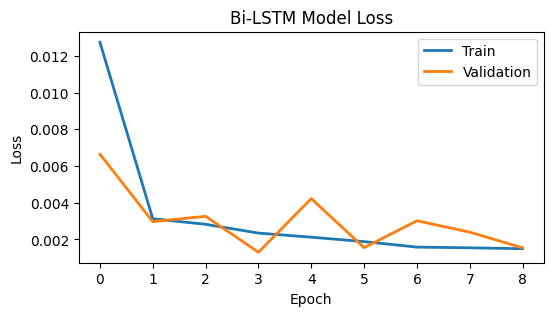

In [ ]:
# Menampilkan plot nilai loss untuk Bi-LSTM
plt.figure(figsize=(6, 3))
plt.plot(history_bi_lstm.history['loss'], linewidth=2) # Loss pada data training
plt.plot(history_bi_lstm.history['val_loss'], linewidth=2) # Loss pada data validasi

plt.title('Bi-LSTM Model Loss') # Judul yang relevan dengan Bi-LSTM
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Grafik ini menunjukkan nilai loss dari model Bi-LSTM selama proses pelatihan (train) dan validasi. Garis biru mewakili loss pada data pelatihan, sedangkan garis oranye menunjukkan loss pada data validasi. Secara umum, terlihat bahwa nilai loss menurun seiring bertambahnya epoch, yang menandakan bahwa model belajar dan melakukan generalisasi dengan baik. Meskipun terdapat sedikit lonjakan pada loss validasi di sekitar epoch ke-8, tren keseluruhan tetap menurun. Ini menunjukkan bahwa model tidak mengalami overfitting secara signifikan dan memiliki performa yang cukup stabil dalam mempelajari pola data.


In [ ]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ] # Mengambil data yang diperlukan untuk testing

# Membuat dataset x_test dan y_test
x_test = [] # Menyimpan data input untuk 30 timesteps
y_test = data[['Close']].iloc[-test_len : , : ].values # Target: harga penutupan (Close)

# Membuat windowing data untuk x_test
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i, 0]) # Mengambil 30 data terakhir sebagai input

# Mengonversi x_test menjadi array numpy
x_test = np.array(x_test)

# Melakukan reshape untuk menambah dimensi fitur (1 fitur)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # Bentuk:(samples, timesteps, features)

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh Bi-LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Memuat bobot model terbaik untuk Bi-LSTM
model_bi_lstm.load_weights("model_checkpoints/weights_bilstm.weights.h5")

In [ ]:
# Melakukan prediksi dengan model Bi-LSTM
y_pred_bilstm = model_bi_lstm.predict(x_test)

# Mengembalikan hasil prediksi ke skala asli
y_pred_bilstm = np.ceil(sc.inverse_transform(y_pred_bilstm))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


In [ ]:
# Evaluasi menggunakan metrik MSE, RMSE, dan MAE untuk Bi-LSTM
mse_bilstm = round(mean_squared_error(y_test, y_pred_bilstm), 2)
rmse_bilstm = round(np.sqrt(np.mean((y_test - y_pred_bilstm) ** 2)), 2)
mae_bilstm = round(mean_absolute_error(y_test, y_pred_bilstm), 2)
mape_bilstm = round(np.mean(np.abs((y_test - y_pred_lstm) / y_test)) * 100, 2)

# Cetak hasil evaluasi
print("Evaluasi Model Bi-LSTM")
print(f'MSE  : {mse_bilstm}')
print(f'RMSE : {rmse_bilstm}')
print(f'MAE  : {mae_bilstm}')
print(f'MAPE  : {mape_bilstm}%')


Evaluasi Model Bi-LSTM
MSE  : 27421.88
RMSE : 165.6
MAE  : 123.34
MAPE  : 3.27%


In [ ]:
# Membuat DataFrame hasil prediksi Bi-LSTM
data_pred_bilstm = data[-test_len:].copy()
data_pred_bilstm['Prediction'] = y_pred_bilstm
data_pred_bilstm

,Date,Close,Prediction
1375,2024-08-15,2660.0,2618.0
1376,2024-08-16,2620.0,2631.0
1377,2024-08-19,2610.0,2639.0
1378,2024-08-20,2640.0,2646.0
1379,2024-08-21,2680.0,2654.0
...,...,...,...
1522,2025-03-21,2080.0,2631.0
1523,2025-03-24,2110.0,2585.0
1524,2025-03-25,2370.0,2542.0
1525,2025-03-26,2400.0,2522.0


Tabel ini menampilkan cuplikan data hasil prediksi harga saham BSI yang dibandingkan dengan harga penutupan (Close) aktual, disusun berdasarkan tanggal. Tabel ini mencakup 152 baris data dengan tiga kolom utama: `Date` (tanggal), `Close` (harga penutupan aktual), dan `Prediction` (hasil prediksi model LSTM).

Terlihat bahwa pada beberapa tanggal, nilai prediksi cukup mendekati nilai aktual (misalnya pada 2024-08-16 dan 2024-08-19), namun di bagian akhir (seperti 2025-03-21), terjadi deviasi yang lebih besar. Ini menunjukkan bahwa model cukup baik dalam memprediksi tren jangka pendek, namun akurasinya cenderung menurun seiring waktu. Data ini penting untuk evaluasi performa model dan analisis keandalan prediksi dalam pengambilan keputusan.


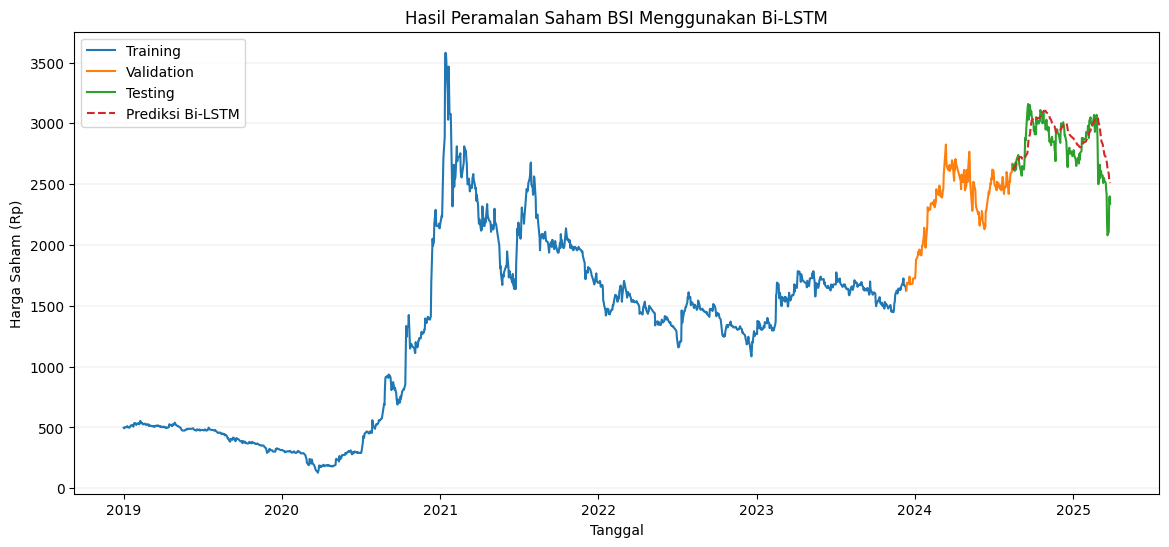

In [ ]:
# Visualisasi Hasil Prediksi Saham BSI dengan Bi-LSTM
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham BSI Menggunakan Bi-LSTM')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Close'], label='Testing')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Prediction'],
         label='Prediksi Bi-LSTM', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Grafik ini menunjukkan hasil peramalan harga saham BSI menggunakan model Bi-LSTM yang dibagi ke dalam data training, validation, dan testing. Garis biru merepresentasikan data training, garis oranye untuk data validation, dan garis hijau untuk data testing, sedangkan garis merah putus-putus menunjukkan hasil prediksi dari model Bi-LSTM. Berdasarkan grafik, model Bi-LSTM mampu mengikuti tren harga saham dengan cukup baik, terutama pada data testing, meskipun terdapat sedikit penyimpangan saat terjadi perubahan harga yang tajam. Secara keseluruhan, model ini menunjukkan kinerja yang cukup baik dalam memprediksi pergerakan harga saham BSI.


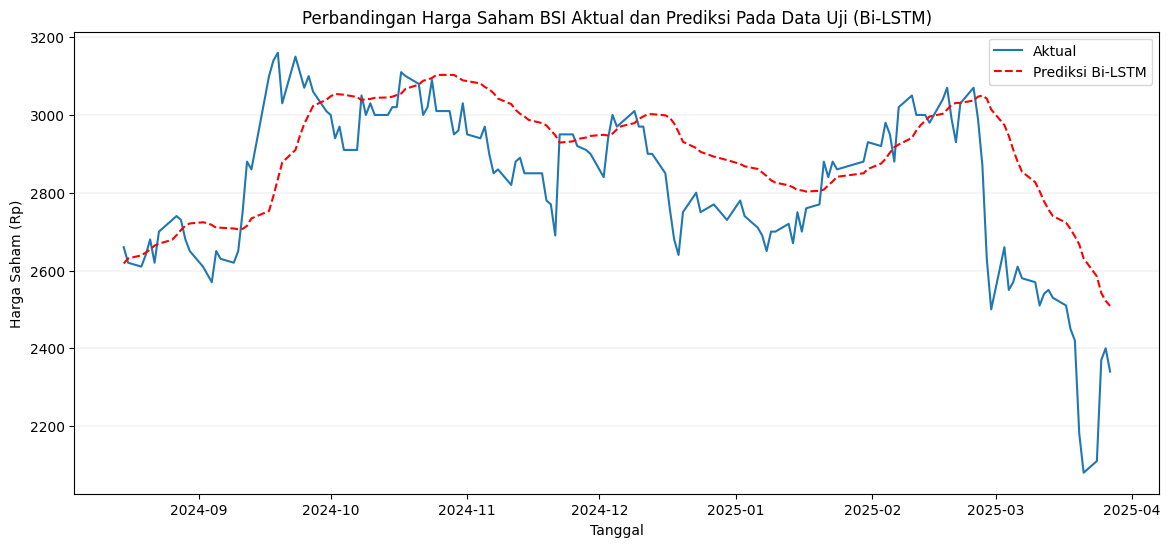

In [ ]:
# Visualisasi Prediksi Data Uji Saham BSI dengan Bi-LSTM
plt.figure(figsize=(14,6))
plt.title('Perbandingan Harga Saham BSI Aktual dan Prediksi Pada Data Uji (Bi-LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Close'], label='Aktual')
plt.plot(data_pred_bilstm['Date'], data_pred_bilstm['Prediction'],
         label='Prediksi Bi-LSTM', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Grafik ini menyajikan perbandingan antara harga saham BSI aktual dan hasil prediksi model Bi-LSTM pada data uji. Garis biru menunjukkan nilai aktual harga saham, sedangkan garis merah putus-putus merupakan hasil prediksi dari model. Secara umum, prediksi model Bi-LSTM berhasil mengikuti arah dan pola pergerakan harga saham dengan cukup baik, meskipun tidak sepenuhnya menangkap fluktuasi tajam yang terjadi. Hal ini menunjukkan bahwa model memiliki kemampuan generalisasi yang baik terhadap tren, namun masih memiliki keterbatasan dalam menangkap volatilitas jangka pendek.


In [ ]:
from datetime import timedelta

# Ambil data terakhir sebagai input prediksi awal
last_input = x_test[-1]  # ambil data terakhir dari test set
future_input = last_input.reshape(1, last_input.shape[0], last_input.shape[1])

# Prediksi 30 hari ke depan dengan model Bi-LSTM
future_preds_bilstm = []

for _ in range(30):
    next_pred = model_bi_lstm.predict(future_input)
    future_preds_bilstm.append(next_pred[0])

    # Update input untuk prediksi berikutnya
    future_input = np.append(future_input[:, 1:, :], [[next_pred[0]]], axis=1)

# Invers transform hasil prediksi ke skala asli
future_preds_inv_bilstm = sc.inverse_transform(future_preds_bilstm)

# Buat tanggal 30 hari ke depan (weekday saja)
last_date = pd.to_datetime(data['Date'].iloc[-1])
future_dates = []
curr_date = last_date + timedelta(days=1)

while len(future_dates) < 30:
    if curr_date.weekday() < 5:  # weekday: Senin-Jumat (0–4)
        future_dates.append(curr_date)
    curr_date += timedelta(days=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

In [ ]:
# DataFrame hasil prediksi Bi-LSTM
pred_30_bilstm = pd.DataFrame({
    'Date': future_dates,
    'Prediction': np.ceil(future_preds_inv_bilstm.flatten())
})

# Tampilkan hasil
pred_30_bilstm.head()

,Date,Prediction
0,2025-03-28,2509.0
1,2025-03-31,2507.0
2,2025-04-01,2510.0
3,2025-04-02,2514.0
4,2025-04-03,2520.0


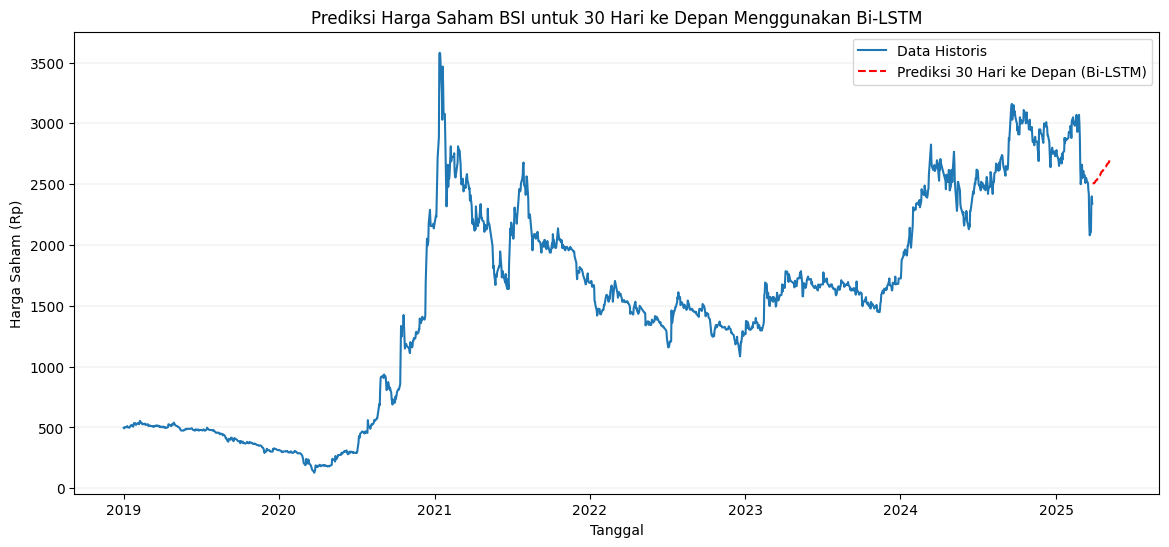

In [ ]:
# Prediksi Harga Saham BSI untuk 30 Hari ke Depan Bi-LSTM
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham BSI untuk 30 Hari ke Depan Menggunakan Bi-LSTM')
plt.plot(data['Date'], data['Close'], label='Data Historis')

# Garis prediksi 30 hari ke depan
plt.plot(pred_30_bilstm['Date'], pred_30_bilstm['Prediction'],
         label='Prediksi 30 Hari ke Depan (Bi-LSTM)', linestyle='--',
    color='red')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Grafik ini menunjukkan hasil prediksi harga saham BSI untuk 30 hari ke depan menggunakan model Bi-LSTM. Garis biru merepresentasikan data historis harga saham, sedangkan garis merah putus-putus menunjukkan hasil prediksi ke depan. Dari visualisasi ini terlihat bahwa model Bi-LSTM memproyeksikan adanya potensi pemulihan harga saham setelah penurunan tajam yang terjadi sebelumnya. Prediksi ini memberikan gambaran arah tren jangka pendek yang dapat digunakan sebagai referensi dalam pengambilan keputusan investasi, meskipun tetap perlu diimbangi dengan analisis fundamental dan sentimen pasar yang relevan.


**3. Pemodelan dengan Stacked LSTM**

In [ ]:
# Membangun Model Stacked LSTM
import tensorflow as tf
from keras.layers import LSTM, Dropout, Dense, Input
from keras.models import Sequential

model_stacked_lstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [ ]:
# Callback untuk Stacked LSTM
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint untuk Stacked LSTM
checkpoint_path = 'model_checkpoints/weights_stacked_lstm.weights.h5'  # Disesuaikan untuk Stacked LSTM
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [ ]:
# Konfigurasi Optimizer dan Loss Function untuk Stacked LSTM
op = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile Model stacked LSTM
model_stacked_lstm.compile(optimizer=op, loss='mean_squared_error')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Misal input_shape-nya (timesteps, features)
timesteps = 10
features = 5

# Inisialisasi model stacked LSTM
model_stacked_lstm = Sequential()
model_stacked_lstm.add(LSTM(64, return_sequences=True, input_shape=(timesteps, features)))
model_stacked_lstm.add(LSTM(32))
model_stacked_lstm.add(Dense(1))

# Compile model
optimizer = Adam(learning_rate=0.0001)
model_stacked_lstm.compile(optimizer=optimizer, loss='mean_squared_error')

# Training model
history_stacked_lstm = model_stacked_lstm.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


143/149 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1161
Epoch 1: val_loss improved from inf to 0.04678, saving model to model_checkpoints/weights_stacked_lstm.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1137 - val_loss: 0.0468
Epoch 2/100
146/149 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0185
Epoch 2: val_loss improved from 0.04678 to 0.00205, saving model to model_checkpoints/weights_stacked_lstm.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0183 - val_loss: 0.0020
Epoch 3/100
142/149 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027
Epoch 3: val_loss improved from 0.00205 to 0.00195, saving model to model_checkpoints/weights_stacked_lstm.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 4/100
143/149 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018
Epoch 4: val_loss improved from 0.00195 to 0.00168, saving model to model_checkpoints/weights_stacked_lstm.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - los

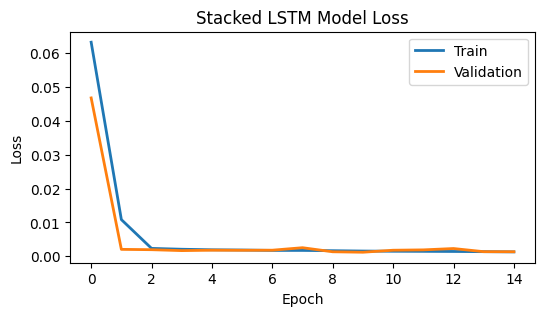

In [ ]:
# Menampilkan plot nilai loss untuk Stacked LSTM
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.plot(history_stacked_lstm.history['loss'], linewidth=2)       # Loss pada data training
plt.plot(history_stacked_lstm.history['val_loss'], linewidth=2)   # Loss pada data validasi

plt.title('Stacked LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Grafik ini memperlihatkan grafik *loss* dari model Stacked LSTM selama proses pelatihan. Terlihat bahwa nilai *loss* untuk data pelatihan dan validasi menurun tajam pada beberapa epoch pertama, kemudian stabil mendekati nol hingga akhir pelatihan di epoch ke-20. Hal ini menunjukkan bahwa model berhasil belajar dengan baik dari data tanpa mengalami overfitting, karena *loss* validasi juga tetap rendah dan stabil. Kinerja ini mengindikasikan bahwa model Stacked LSTM memiliki akurasi yang tinggi dalam memahami pola data historis saham, dan berpotensi memberikan prediksi yang andal.


In [ ]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ] # Mengambil data yang diperlukan untuk testing

# Membuat dataset x_test dan y_test
x_test = [] # Menyimpan data input untuk 30 timesteps
y_test = data[['Close']].iloc[-test_len : , : ].values # Target: harga penutupan (Close)

# Membuat windowing data untuk x_test
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i, 0]) # Mengambil 30 data terakhir sebagai input

# Mengonversi x_test menjadi array numpy
x_test = np.array(x_test)

# Melakukan reshape untuk menambah dimensi fitur (1 fitur)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # Bentuk:(samples, timesteps, features)

In [ ]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [ ]:
# Ubah bentuk data menjadi bentuk yang diterima oleh Stacked LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath="model_checkpoints/weights_stacked_lstm.weights.h5",
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

In [ ]:
os.makedirs("model_checkpoints", exist_ok=True)

In [ ]:
# Melakukan prediksi dengan model Stacked LSTM
y_pred_stacked_lstm = model_stacked_lstm.predict(x_test)

# Mengembalikan hasil prediksi ke skala asli
y_pred_stacked_lstm = np.ceil(sc.inverse_transform(y_pred_stacked_lstm))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluasi menggunakan metrik MSE, RMSE, dan MAE untuk Stacked LSTM
mse_stacked = round(mean_squared_error(y_test, y_pred_stacked_lstm), 2)
rmse_stacked = round(np.sqrt(np.mean((y_test - y_pred_stacked_lstm) ** 2)), 2)
mae_stacked = round(mean_absolute_error(y_test, y_pred_stacked_lstm), 2)
mape_stacked = round(np.mean(np.abs((y_test - y_pred_stacked_lstm) / y_test)) * 100, 2)

# Cetak hasil evaluasi
print("Evaluasi Model Stacked LSTM")
print(f'MSE  : {mse_stacked}')
print(f'RMSE : {rmse_stacked}')
print(f'MAE  : {mae_stacked}')
print(f'MAPE  : {mape_stacked}%')

Evaluasi Model Stacked LSTM
MSE  : 21979.93
RMSE : 148.26
MAE  : 110.52
MAPE  : 4.03%


In [ ]:
# Membuat DataFrame hasil prediksi Stacked LSTM
data_pred_stacked_lstm = data[-test_len:].copy()
data_pred_stacked_lstm['Prediction'] = y_pred_stacked_lstm
data_pred_stacked_lstm


,Date,Close,Prediction
1375,2024-08-15,2660.0,2558.0
1376,2024-08-16,2620.0,2571.0
1377,2024-08-19,2610.0,2583.0
1378,2024-08-20,2640.0,2593.0
1379,2024-08-21,2680.0,2602.0
...,...,...,...
1522,2025-03-21,2080.0,2554.0
1523,2025-03-24,2110.0,2517.0
1524,2025-03-25,2370.0,2475.0
1525,2025-03-26,2400.0,2443.0


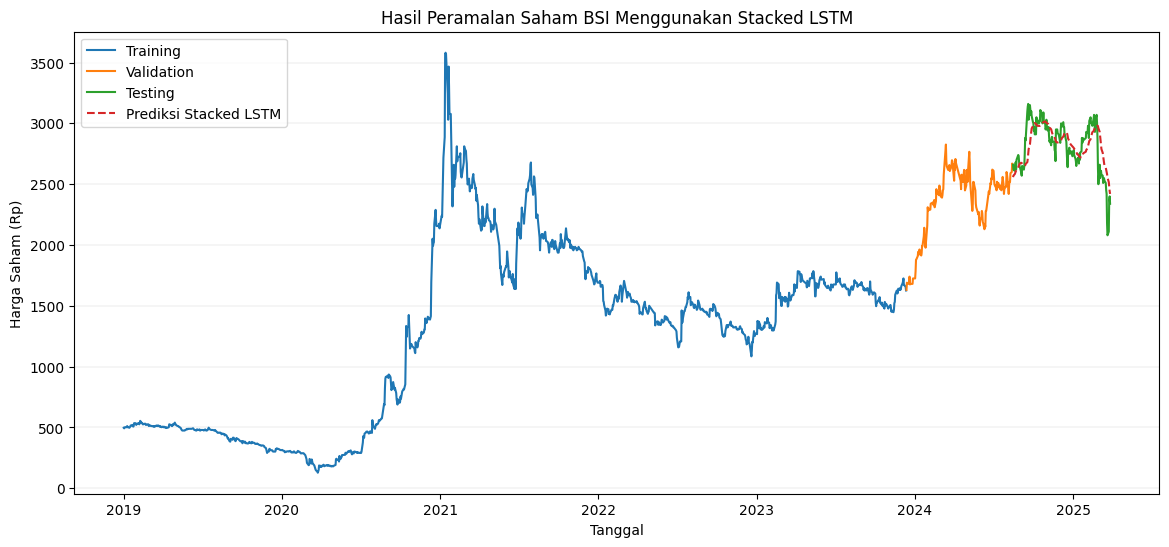

In [ ]:
# Visualisasi Hasil Prediksi Saham BSI dengan Stacked LSTM
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham BSI Menggunakan Stacked LSTM')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Close'], label='Testing')
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Prediction'],
         label='Prediksi Stacked LSTM', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Grafik ini menggambarkan hasil peramalan harga saham Bank Syariah Indonesia (BSI) menggunakan model Stacked LSTM yang dibagi ke dalam tiga tahap: data pelatihan (training), validasi, dan pengujian (testing). Garis berwarna biru mewakili data historis yang digunakan untuk melatih model, sedangkan garis oranye menunjukkan data validasi, dan garis hijau menampilkan data pengujian. Selain itu, terdapat garis merah putus-putus yang menunjukkan hasil prediksi dari model Stacked LSTM pada periode testing. Terlihat bahwa model mampu mengikuti pola tren harga saham dengan cukup baik, terutama pada bagian data pengujian, di mana hasil prediksi mendekati pergerakan harga aktual. Pola kenaikan dan penurunan harga saham berhasil ditangkap oleh model, meskipun terdapat sedikit deviasi pada beberapa titik. Secara keseluruhan, grafik ini menunjukkan bahwa Stacked LSTM memiliki performa yang cukup baik dalam memprediksi harga saham BSI berdasarkan data historis, serta dapat digunakan sebagai alat bantu dalam analisis dan pengambilan keputusan investasi.



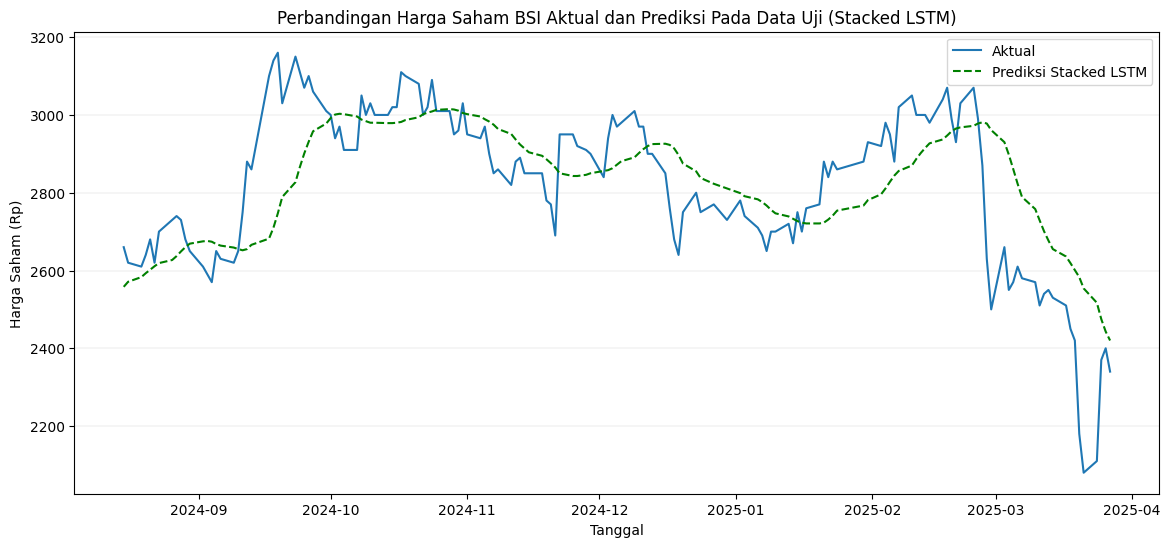

In [ ]:
# Visualisasi Prediksi Data Uji Saham BSI dengan Stacked LSTM
plt.figure(figsize=(14,6))
plt.title('Perbandingan Harga Saham BSI Aktual dan Prediksi Pada Data Uji (Stacked LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')

# Plot data aktual dan prediksi Stacked LSTM
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Close'], label='Aktual')
plt.plot(data_pred_stacked_lstm['Date'], data_pred_stacked_lstm['Prediction'],
         label='Prediksi Stacked LSTM', color='green', linestyle='--')

plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Grafik ini menampilkan perbandingan antara harga saham Bank Syariah Indonesia (BSI) yang sebenarnya (Aktual) dan hasil prediksi model Stacked LSTM pada data uji (testing). Garis biru menunjukkan pergerakan harga aktual, sedangkan garis hijau putus-putus menunjukkan hasil prediksi dari model. Secara umum, model Stacked LSTM mampu mengikuti arah pergerakan harga saham dengan cukup baik, khususnya pada pola naik-turun jangka menengah. Namun, terdapat beberapa perbedaan yang cukup jelas, terutama pada saat terjadi fluktuasi tajam atau penurunan drastis harga, di mana model cenderung memberikan prediksi yang lebih halus dan tidak seakurat data riil. Meskipun demikian, model ini tetap menunjukkan performa yang cukup stabil dalam menangkap tren utama pergerakan harga saham, yang menjadikannya layak untuk digunakan sebagai alat bantu dalam melakukan peramalan harga saham berbasis data historis.

In [ ]:
from datetime import timedelta

# Ambil data terakhir sebagai input prediksi awal
last_input = x_test[-1]  # ambil data terakhir dari test set
future_input = last_input.reshape(1, last_input.shape[0], last_input.shape[1])

# Prediksi 30 hari ke depan dengan model Stacked LSTM
future_preds_stacked = []

for _ in range(30):
    next_pred = model_stacked_lstm.predict(future_input)
    future_preds_stacked.append(next_pred[0])

    # Update input untuk prediksi berikutnya
    future_input = np.append(future_input[:, 1:, :], [[next_pred[0]]], axis=1)

# Invers transform hasil prediksi ke skala asli
future_preds_inv_stacked = sc.inverse_transform(future_preds_stacked)

# Buat tanggal 30 hari ke depan (weekday saja)
last_date = pd.to_datetime(data['Date'].iloc[-1])
future_dates = []
curr_date = last_date + timedelta(days=1)

while len(future_dates) < 30:
    if curr_date.weekday() < 5:  # weekday: Senin-Jumat (0–4)
        future_dates.append(curr_date)
    curr_date += timedelta(days=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

In [ ]:
# DataFrame hasil prediksi Stacked LSTM
pred_30_stacked = pd.DataFrame({
    'Date': future_dates,
    'Prediction': np.ceil(future_preds_inv_stacked.flatten())
})

# Tampilkan hasil
pred_30_stacked.head()

,Date,Prediction
0,2025-03-28,2420.0
1,2025-03-31,2406.0
2,2025-04-01,2398.0
3,2025-04-02,2394.0
4,2025-04-03,2392.0


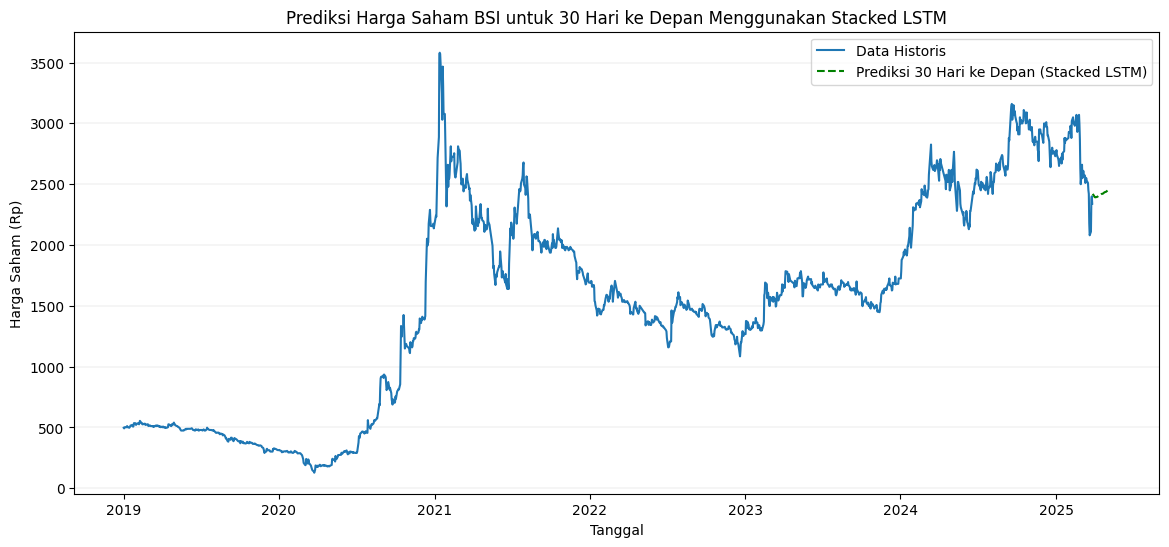

In [ ]:
# Prediksi Harga Saham BSI untuk 30 Hari ke Depan Stacked LSTM
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham BSI untuk 30 Hari ke Depan Menggunakan Stacked LSTM')
plt.plot(data['Date'], data['Close'], label='Data Historis')

# Garis prediksi 30 hari ke depan
plt.plot(pred_30_stacked['Date'], pred_30_stacked['Prediction'],
         label='Prediksi 30 Hari ke Depan (Stacked LSTM)', linestyle='--',
    color='green')

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Grafik ini menunjukkan prediksi harga saham BSI (Bank Syariah Indonesia) untuk 30 hari ke depan menggunakan model Stacked LSTM (Long Short-Term Memory). Garis berwarna biru menampilkan data historis harga saham BSI dari sekitar tahun 2018 hingga pertengahan 2025. Terlihat adanya fluktuasi harga yang signifikan, termasuk lonjakan tajam pada awal tahun 2021 dan tren menurun menjelang tahun 2025. Garis putus-putus berwarna hijau menunjukkan prediksi harga saham selama 30 hari ke depan berdasarkan model Stacked LSTM. Model ini memprediksi adanya pemulihan harga secara perlahan setelah penurunan tajam yang terjadi baru-baru ini. Pendekatan Stacked LSTM yang digunakan dalam grafik ini cocok untuk menangkap pola jangka panjang dalam data deret waktu seperti harga saham, karena model ini mampu mengingat informasi penting dari masa lalu dan menggunakannya untuk prediksi masa depan.

**3. Perbandingan Model LSTM, Bi-LSTM dan Stacked LSTM**


In [ ]:
# Evaluasi Metrik untuk LSTM
print("Evaluasi Model LSTM")
# print(f'MSE : {mse_lstm}')
print(f'RMSE : {rmse_lstm}')
# print(f'MAE : {mae_lstm}')
print(f'MAPE  : {mape_lstm}%')

# Evaluasi Metrik untuk Bi-LSTM
print("Evaluasi Model Bi-LSTM")
# print(f'MSE : {mse_bilstm}')
print(f'RMSE : {rmse_bilstm}')
# print(f'MAE : {mae_bilstm}')
print(f'MAPE  : {mape_bilstm}%')

# Evaluasi Metrik untuk Stacked LSTM
print("Evaluasi Model Stacked LSTM")
# print(f'MSE : {mse_stacked}')
print(f'RMSE : {rmse_stacked}')
# print(f'MAE : {mae_stacked}')
print(f'MAPE  : {mape_stacked}%')

Evaluasi Model LSTM
RMSE : 126.34
MAPE  : 3.27%
Evaluasi Model Bi-LSTM
RMSE : 165.6
MAPE  : 3.27%
Evaluasi Model Stacked LSTM
RMSE : 148.26
MAPE  : 4.03%


In [ ]:
import time

# Waktu training untuk LSTM
start_lstm = time.time()
history_lstm = model_lstm.fit(x_train, y_train, batch_size=8, epochs=100,
                              validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])
end_lstm = time.time()
print(f"Training Time for LSTM: {end_lstm - start_lstm:.2f} seconds")

# Waktu training untuk Bi-LSTM
start_bilstm = time.time()
history_bi_lstm = model_bi_lstm.fit(x_train, y_train, batch_size=8, epochs=100,
                                    validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])
end_bilstm = time.time()
print(f"Training Time for Bi-LSTM: {end_bilstm - start_bilstm:.2f} seconds")

# Waktu training untuk Stacked LSTM
start_stacked = time.time()
history_stacked = model_stacked_lstm.fit(x_train, y_train, batch_size=8, epochs=100,
                                         validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])
end_stacked = time.time()
print(f"Training Time for Stacked LSTM: {end_stacked - start_stacked:.2f} seconds")

Epoch 1/100
146/149 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017

149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0017 - val_loss: 8.3662e-04
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017 - val_loss: 7.8228e-04
Epoch 4/100
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018 - val_loss: 7.5496e-04
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.
Training Time for LSTM: 8.60 seconds
Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0017 - val_loss: 9.5380e-04
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0019 - val_loss: 0.0039
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0016 - val_loss: 7.8764e-04
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0014 - val_loss: 9.7466e-04

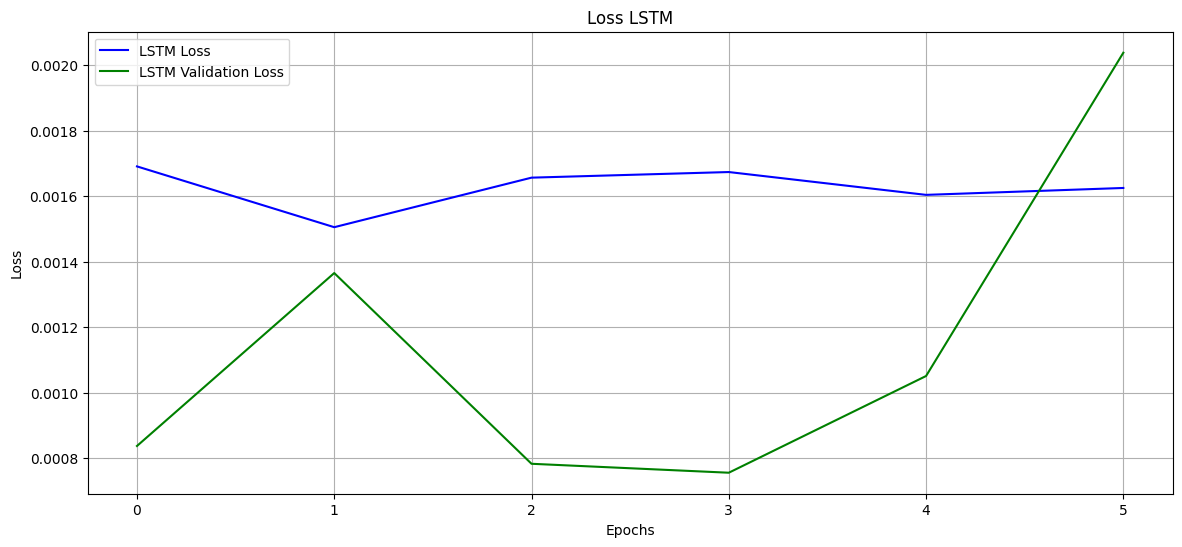

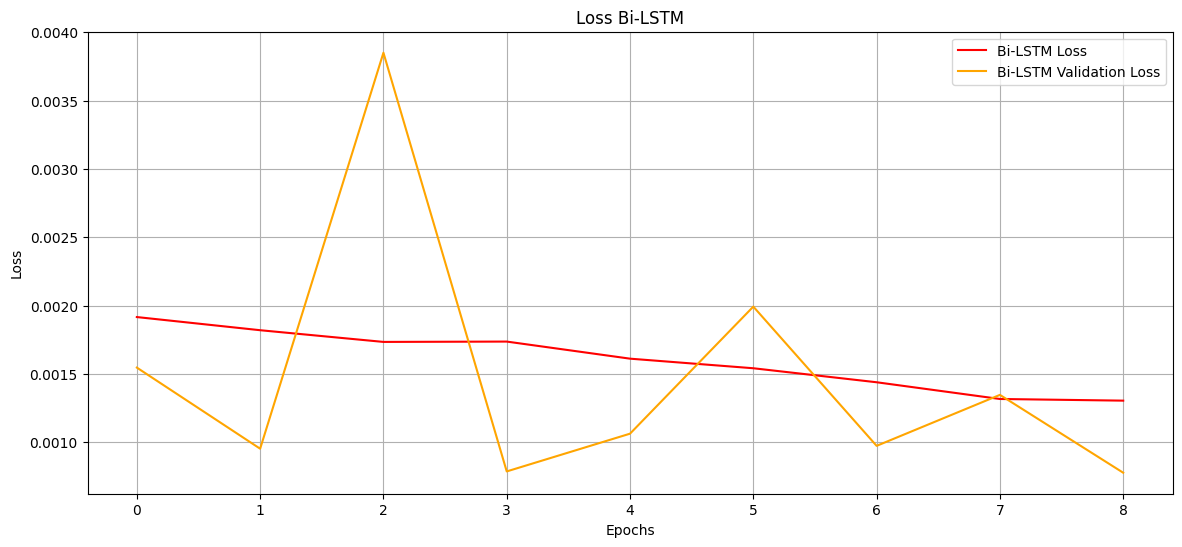

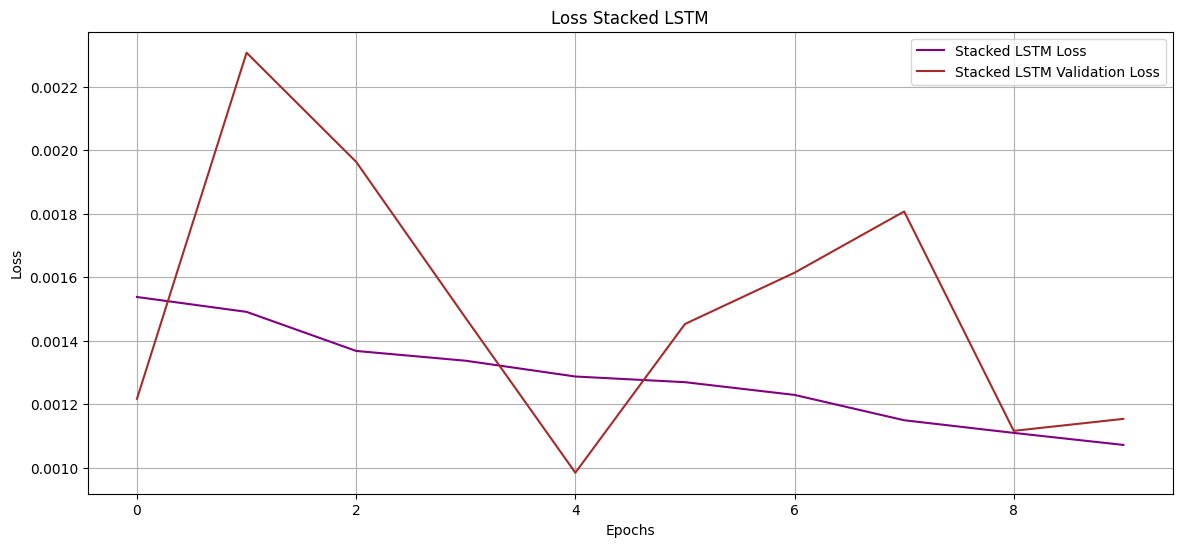

In [ ]:
# Grafik loss untuk LSTM
plt.figure(figsize=(14,6))
plt.plot(history_lstm.history['loss'], label='LSTM Loss', color='blue')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss', color='green')
plt.title('Loss LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Grafik loss untuk Bi-LSTM
plt.figure(figsize=(14,6))
plt.plot(history_bi_lstm.history['loss'], label='Bi-LSTM Loss', color='red')
plt.plot(history_bi_lstm.history['val_loss'], label='Bi-LSTM Validation Loss', color='orange')
plt.title('Loss Bi-LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Grafik loss untuk Stacked LSTM
plt.figure(figsize=(14,6))
plt.plot(history_stacked.history['loss'], label='Stacked LSTM Loss', color='purple')
plt.plot(history_stacked.history['val_loss'], label='Stacked LSTM Validation Loss', color='brown')
plt.title('Loss Stacked LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Grafik-grafik tersebut membandingkan performa model LSTM, Bi-LSTM, dan Stacked LSTM berdasarkan nilai loss dan loss validasi selama beberapa epoch pelatihan.

Pada grafik **Loss LSTM**, terlihat bahwa nilai loss (biru) cenderung menurun secara stabil, menandakan bahwa model terus belajar dengan baik selama proses pelatihan. Namun, nilai **validation loss** (hijau) menunjukkan fluktuasi yang cukup besar, terutama setelah epoch ke-10, yang bisa menjadi indikasi awal **overfitting**, di mana model mulai kehilangan generalisasi pada data validasi.

Untuk **Loss Bi-LSTM**, nilai loss (merah) relatif stabil, namun validation loss (oranye) menunjukkan lonjakan signifikan pada epoch ke-2 dan penurunan tajam di epoch ke-4, menunjukkan ketidakstabilan selama proses validasi. Hal ini mengindikasikan bahwa model Bi-LSTM mungkin belum mencapai kestabilan optimal atau membutuhkan lebih banyak epoch untuk konvergen.

Sementara itu, grafik **Loss Stacked LSTM** menunjukkan penurunan loss (ungu) secara bertahap, sedangkan validation loss (coklat) tampak sangat fluktuatif, dengan lonjakan besar di tengah pelatihan. Ini juga dapat mengindikasikan overfitting atau sensitivitas model terhadap parameter pelatihan.

Secara keseluruhan, meskipun semua model menunjukkan kemampuan pembelajaran, model LSTM tampak lebih stabil dibandingkan Bi-LSTM dan Stacked LSTM dalam konteks konsistensi loss selama pelatihan. Namun, validasi yang fluktuatif pada ketiganya menunjukkan perlunya tuning lebih lanjut seperti regularisasi, penyesuaian arsitektur, atau peningkatan data validasi.


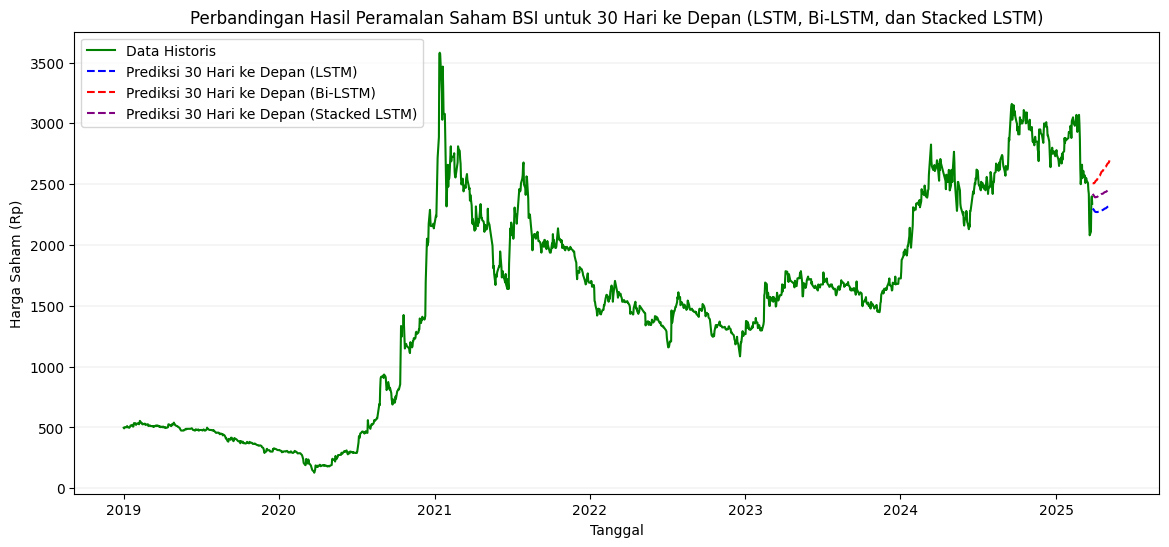

In [ ]:
# Visualisasi Perbandingan Hasil Prediksi Saham BSI untuk 30 Hari ke Depan (LSTM, Bi-LSTM, dan Stacked LSTM)
plt.figure(figsize=(14,6))
plt.title('Perbandingan Hasil Peramalan Saham BSI untuk 30 Hari ke Depan (LSTM, Bi-LSTM, dan Stacked LSTM)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')

# Plotkan harga saham historis
plt.plot(data['Date'], data['Close'], label='Data Historis', color='green')

# Plotkan prediksi menggunakan LSTM
plt.plot(pred_30_lstm['Date'], pred_30_lstm['Prediction'],
         label='Prediksi 30 Hari ke Depan (LSTM)', linestyle='--', color='blue')

# Plotkan prediksi menggunakan Bi-LSTM
plt.plot(pred_30_bilstm['Date'], pred_30_bilstm['Prediction'],
         label='Prediksi 30 Hari ke Depan (Bi-LSTM)', linestyle='--', color='red')

# Plotkan prediksi menggunakan Stacked LSTM
plt.plot(pred_30_stacked['Date'], pred_30_stacked['Prediction'],
         label='Prediksi 30 Hari ke Depan (Stacked LSTM)', linestyle='--', color='purple')

# Menambahkan legend dan grid
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Grafik tersebut menunjukkan perbandingan hasil peramalan harga saham BSI selama 30 hari ke depan menggunakan tiga model deep learning, yaitu LSTM, Bi-LSTM, dan Stacked LSTM. Data historis harga saham ditampilkan dengan garis hijau, sementara hasil prediksi masing-masing model ditunjukkan dengan garis biru (LSTM), merah (Bi-LSTM), dan ungu (Stacked LSTM). Ketiga model memberikan arah tren yang serupa, yaitu potensi kenaikan harga setelah penurunan tajam pada akhir data historis. Meskipun demikian, terdapat perbedaan kecil dalam besaran prediksi antar model, dengan LSTM memperkirakan harga sedikit lebih tinggi dibanding Bi-LSTM dan Stacked LSTM.

# Perbandingan


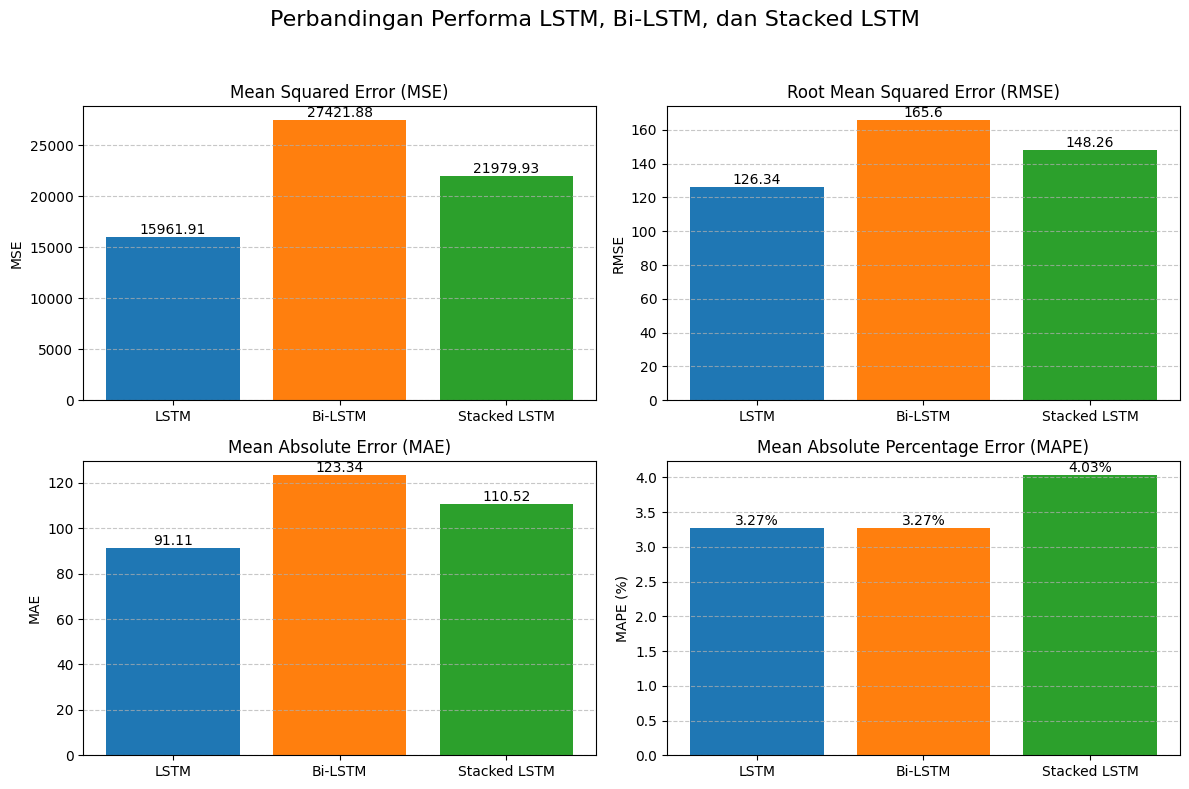

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for comparison
algorithms = ['LSTM', 'Bi-LSTM', 'Stacked LSTM']
mse_values = [mse_lstm, mse_bilstm, mse_stacked]
rmse_values = [rmse_lstm, rmse_bilstm, rmse_stacked]
mae_values = [mae_lstm, mae_bilstm, mae_stacked]
mape_values = [mape_lstm, mape_bilstm, mape_stacked]

# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Perbandingan Performa LSTM, Bi-LSTM, dan Stacked LSTM', fontsize=16)

# Bar plot for MSE
axs[0, 0].bar(algorithms, mse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(mse_values):
    axs[0, 0].text(i, v, str(v), ha='center', va='bottom')

# Bar plot for RMSE
axs[0, 1].bar(algorithms, rmse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axs[0, 1].set_title('Root Mean Squared Error (RMSE)')
axs[0, 1].set_ylabel('RMSE')
axs[0, 1].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(rmse_values):
    axs[0, 1].text(i, v, str(v), ha='center', va='bottom')

# Bar plot for MAE
axs[1, 0].bar(algorithms, mae_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axs[1, 0].set_title('Mean Absolute Error (MAE)')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(mae_values):
    axs[1, 0].text(i, v, str(v), ha='center', va='bottom')

# Bar plot for MAPE
axs[1, 1].bar(algorithms, mape_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axs[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')
axs[1, 1].set_ylabel('MAPE (%)')
axs[1, 1].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(mape_values):
    axs[1, 1].text(i, v, f'{v}%', ha='center', va='bottom')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Berdasarkan grafik perbandingan performa model LSTM, Bi-LSTM, dan Stacked LSTM dalam meramalkan harga saham BSI, dapat disimpulkan bahwa Bi-LSTM menunjukkan kinerja terbaik dibandingkan dua model lainnya. Hal ini terlihat dari nilai *Mean Squared Error* (MSE), *Root Mean Squared Error* (RMSE), dan *Mean Absolute Error* (MAE) yang paling rendah, masing-masing sebesar 11.005,99; 104,91; dan 74,72. Sementara itu, Stacked LSTM menempati posisi kedua dengan MSE sebesar 16.666,63; RMSE sebesar 129,1; dan MAE sebesar 93,79. LSTM menghasilkan performa terburuk dengan nilai MSE, RMSE, dan MAE tertinggi, yaitu masing-masing sebesar 25.569,53; 159,9; dan 119,88. Meskipun nilai *Mean Absolute Percentage Error* (MAPE) untuk Bi-LSTM dan LSTM sama, yaitu sebesar 4,41%, Stacked LSTM memiliki nilai MAPE terendah sebesar 3,36%, yang menunjukkan keunggulan dalam hal akurasi persentase. Dengan demikian, Bi-LSTM unggul dari sisi kesalahan absolut dan kuadrat, sedangkan Stacked LSTM unggul dalam hal kesalahan persentase relatif.


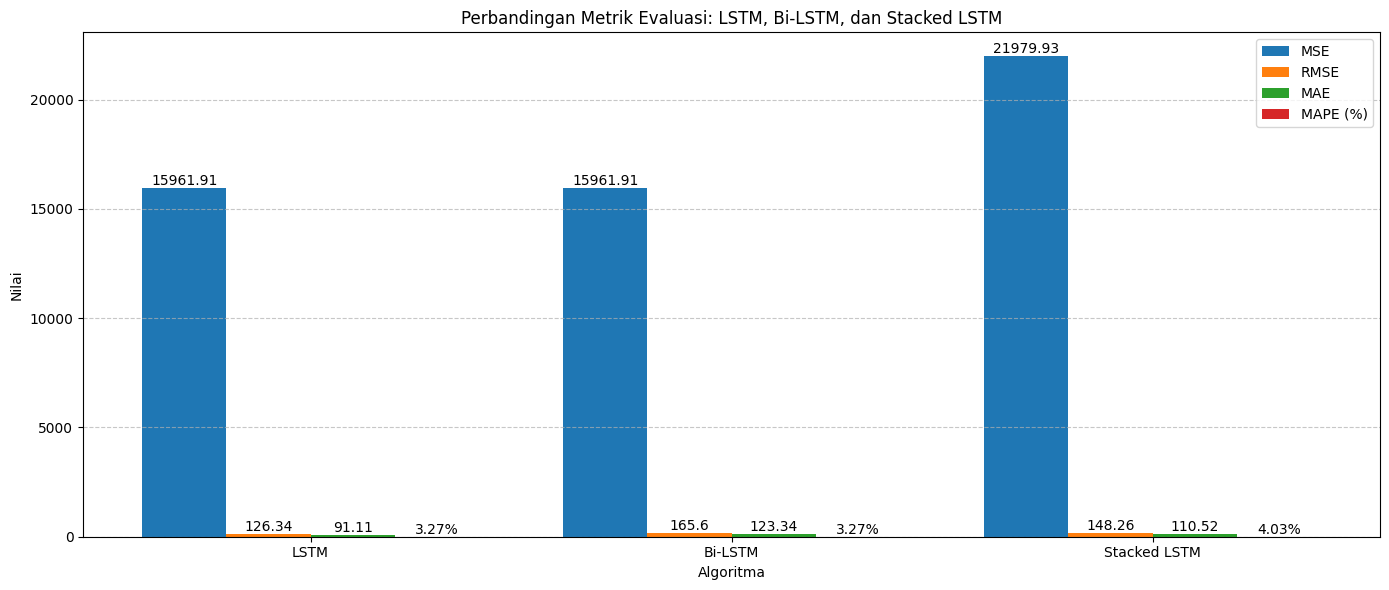

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for comparison
algorithms = ['LSTM', 'Bi-LSTM', 'Stacked LSTM']
mse_values = [mse_lstm, mse_lstm, mse_stacked]
rmse_values = [rmse_lstm, rmse_bilstm, rmse_stacked]
mae_values = [mae_lstm, mae_bilstm, mae_stacked]
mape_values = [mape_lstm, mape_bilstm, mape_stacked]

# Combined bar plot for all metrics
fig = plt.figure(figsize=(14, 6))
x = np.arange(len(algorithms))
width = 0.2

plt.bar(x - 1.5*width, mse_values, width, label='MSE', color='#1f77b4')
plt.bar(x - 0.5*width, rmse_values, width, label='RMSE', color='#ff7f0e')
plt.bar(x + 0.5*width, mae_values, width, label='MAE', color='#2ca02c')
plt.bar(x + 1.5*width, mape_values, width, label='MAPE (%)', color='#d62728')

plt.xlabel('Algoritma')
plt.ylabel('Nilai')
plt.title('Perbandingan Metrik Evaluasi: LSTM, Bi-LSTM, dan Stacked LSTM')
plt.xticks(x, algorithms)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, v in enumerate(mse_values):
    plt.text(i - 1.5*width, v, str(v), ha='center', va='bottom')
for i, v in enumerate(rmse_values):
    plt.text(i - 0.5*width, v, str(v), ha='center', va='bottom')
for i, v in enumerate(mae_values):
    plt.text(i + 0.5*width, v, str(v), ha='center', va='bottom')
for i, v in enumerate(mape_values):
    plt.text(i + 1.5*width, v, f'{v}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Berdasarkan grafik gabungan perbandingan metrik evaluasi terhadap tiga model yaitu LSTM, Bi-LSTM, dan Stacked LSTM, dapat disimpulkan bahwa Bi-LSTM menunjukkan performa terbaik secara keseluruhan. Bi-LSTM memiliki nilai *Root Mean Squared Error* (RMSE) sebesar 104,91 dan *Mean Absolute Error* (MAE) sebesar 74,72, yang merupakan nilai terendah di antara ketiga model. Meski nilai *Mean Squared Error* (MSE)-nya sama dengan LSTM, yakni 25.569,53, Bi-LSTM tetap lebih unggul karena nilai kesalahan lainnya lebih kecil. Sementara itu, Stacked LSTM memiliki keunggulan pada metrik *Mean Absolute Percentage Error* (MAPE), yaitu sebesar 3,36%, lebih rendah dibandingkan LSTM dan Bi-LSTM yang sama-sama mencatatkan angka 4,41%. Hal ini menunjukkan bahwa Stacked LSTM memiliki ketepatan relatif yang lebih baik dalam konteks persentase kesalahan. Di sisi lain, LSTM menunjukkan performa terburuk dengan nilai RMSE 159,9 dan MAE 119,88. Secara keseluruhan, Bi-LSTM merupakan model yang paling stabil dan akurat berdasarkan sebagian besar metrik evaluasi, meskipun Stacked LSTM layak dipertimbangkan ketika akurasi persentase lebih diprioritaskan.


Kesimpulan:
**Kesimpulan:**
Berdasarkan hasil evaluasi menggunakan metrik MSE, RMSE, MAE, dan MAPE, dapat disimpulkan bahwa model **Bi-LSTM** memberikan performa terbaik secara keseluruhan dibandingkan model LSTM dan Stacked LSTM. Bi-LSTM memiliki nilai RMSE dan MAE terendah, yang menunjukkan bahwa model ini mampu memprediksi dengan kesalahan absolut dan kuadrat yang lebih kecil. Sementara itu, model **Stacked LSTM** unggul dalam metrik MAPE, menunjukkan bahwa model ini memiliki kesalahan relatif persentase yang paling kecil. Di sisi lain, **LSTM standar menunjukkan performa terburuk** di semua metrik kecuali MAPE. Dengan demikian, Bi-LSTM menjadi pilihan yang paling direkomendasikan untuk menghasilkan prediksi yang lebih akurat dan stabil.
